In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [458]:
USeast = MultiModelLargeEnsemble(models=['CanESM5','cesm_lens',
                                         'MIROC6','MPI-ESM1-2-LR','EC-Earth3'],
                                 variable='pr', granularity='day', lat=41.3, lon=-72.5,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_pr_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_pr_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_pr_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_pr_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_pr_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_pr_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_pr_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_pr_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_pr_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_pr_41.3_287.5.zarr


In [465]:
c_hist, c_future = USeast.quantile_occurance(10, conseq_days=5)

In [466]:
nc_hist, nc_future = USeast.non_conseq_extreme_occurrance(10, conseq_days=5)

Expected events = 9.500068446269678
Starting q = 0.9997262149212868


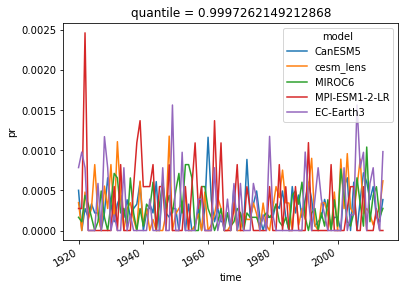

In [467]:
c_hist.resample(time='AS').mean().mean('member').plot(hue='model');

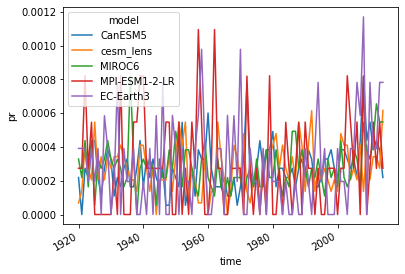

In [468]:
nc_hist.resample(time='AS').mean().mean('member').plot(hue='model');

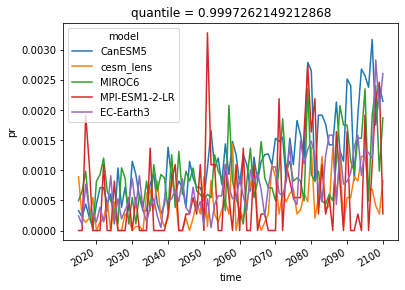

In [469]:
c_future.mean('member').resample(time='AS').mean().plot(hue='model');

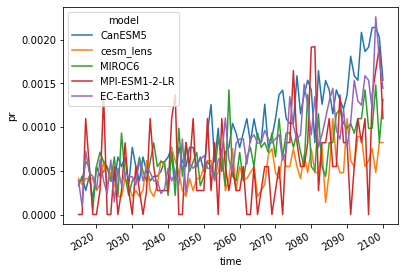

In [470]:
nc_future.mean('member').resample(time='AS').mean().plot(hue='model');

In [471]:
c_future_10yr = c_future.resample(time='AS').mean().rolling(
    time=10, center=True).mean()
nc_future_10yr = nc_future.resample(time='AS').mean().rolling(
    time=10, center=True).mean()

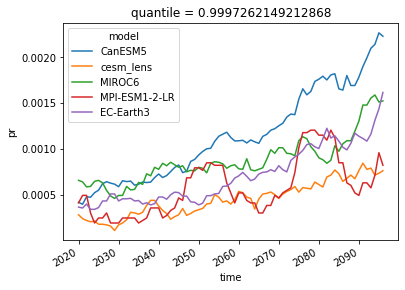

In [472]:
c_future_10yr.mean('member').plot(hue='model');

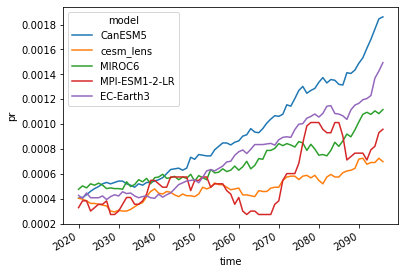

In [473]:
nc_future_10yr.mean('member').plot(hue='model');

In [474]:
import seaborn as sns

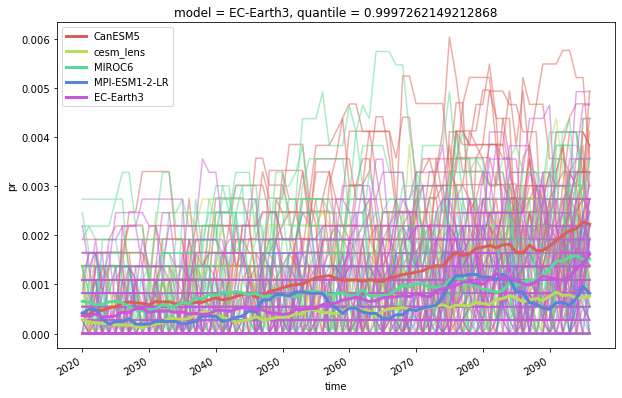

In [475]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("hls", len(c_future_10yr.model))
for i, model in enumerate(c_future_10yr.model):
    m = c_future_10yr.sel(model=model)
    m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5)
    m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10)
plt.legend()

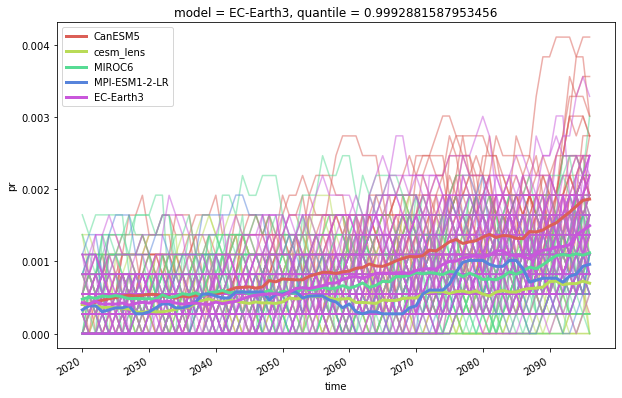

In [476]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("hls", len(nc_future_10yr.model))
for i, model in enumerate(nc_future_10yr.model):
    m = nc_future_10yr.sel(model=model)
    m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5)
    m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10)
plt.legend()

In [477]:
Ic = c_future_10yr.var('member').mean('model')
Inc = nc_future_10yr.var('member').mean('model')

In [478]:
Mc = c_future_10yr.mean('member').var('model')
Mnc = nc_future_10yr.mean('member').var('model')

In [479]:
Tc = Ic + Mc
I_fracc = Ic/Tc
M_fracc = Mc/Tc

Tnc = Inc + Mnc
I_fracnc = Inc/Tnc
M_fracnc = Mnc/Tnc

In [480]:
Sc = c_future_10yr.mean(('model', 'member')) - c_hist.mean()
Snc = nc_future_10yr.mean(('model', 'member')) - nc_hist.mean()

In [481]:
max_improvementc = 1 - np.sqrt(Ic + 0.0* Mc) / np.sqrt(Tc) 
max_improvementnc = 1 - np.sqrt(Inc + 0.0* Mnc) / np.sqrt(Tnc) 

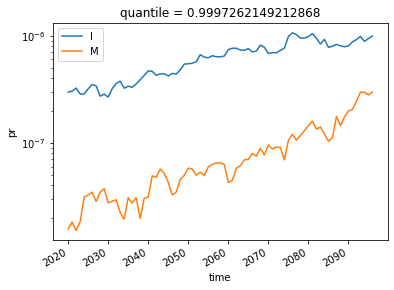

In [482]:
Ic.plot(label='I')
Mc.plot(label='M')
plt.legend();
plt.yscale('log')

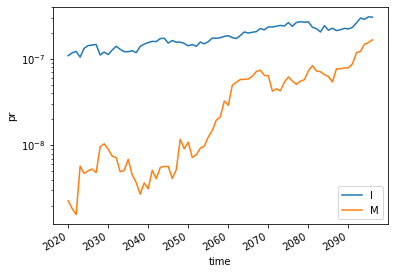

In [483]:
Inc.plot(label='I')
Mnc.plot(label='M')
plt.legend();
plt.yscale('log')

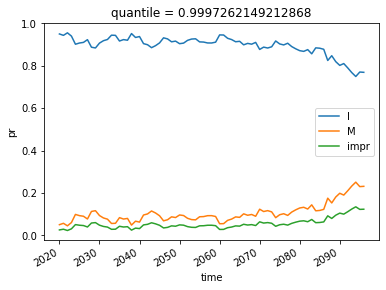

In [484]:
I_fracc.plot(label='I')
M_fracc.plot(label='M')
max_improvementc.plot(label = 'impr')
plt.legend();

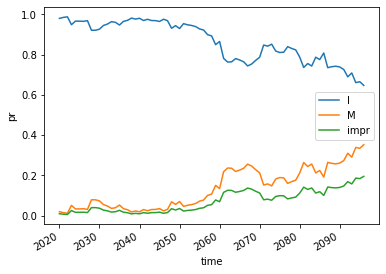

In [485]:
I_fracnc.plot(label='I')
M_fracnc.plot(label='M')
max_improvementnc.plot(label = 'impr')
plt.legend();

In [275]:
SNR_T = S / np.sqrt(T)
SNR_I = S / np.sqrt(I)

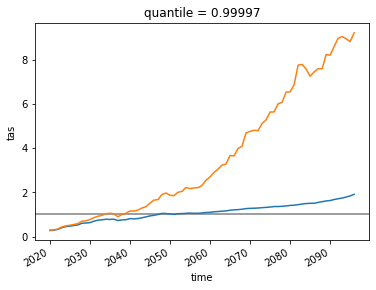

In [279]:
SNR_T.plot()
SNR_I.plot()
plt.axhline(1, zorder=0.1, c='0.5')